In [1]:
import numpy as np
import pandas as pd
import os
import csv as excel
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
filename = 'cantab_res.csv'



Create whole CSV file

In [24]:

# Specify the path to the folder containing the folders
folder_path = 'data'

# Get a list of all items (files and folders) in the specified folder
items = os.listdir(folder_path)

# Filter out only the folders
folders = [item for item in items if os.path.isdir(os.path.join(folder_path, item))]
print(folders)
data = [['name', 'gender' , 'avg_rt_mot' , 'var_rt_mot' , 'avg_distance_mot' , 'avg_rt_blc' , 'var_rt_blc', 'sum_correct_blc' , 'avg_rt_ast' , 'var_rt_ast' , 'sum_correct_ast' , 'sum_omit_ast' , 'sum_incorrect_ast' , 'avg_rt_sst', 'var_rt_sst' , 'sum_correct_sst'  , 'game_record' ,'coin_ratio']]
# Print the list of folders
print("Folders in the directory:")

for folder in folders:

    folders1 = os.listdir(folder_path + '/' + folder + '/')
    print(os.listdir(folder_path+ '/' + folder +'/'))
    print(folders1)
    for folder1 in folders1:
        temp_data_mot = []
        temp_data_blc = []
        temp_data_ast = []
        temp_data_sst = []
        #print(folder_path + '/' + folder + '/' + folder1 + '/' + csv)
        if folder1[0] =='.' :
            continue
        csvs = os.listdir(folder_path + '/' + folder + '/' + folder1)
        for csv in csvs:
            if csv.split('-')[1].split('.')[0] == 'mot':

                temp_data_mot.append(folder1)
                temp_data_mot.append(folder)
                temp_data_mot.append(pd.read_csv(folder_path + '/' + folder + '/' + folder1 + '/' + csv)['hit latency'].mean()/1000) 
                temp_data_mot.append(pd.read_csv(folder_path + '/' + folder + '/' + folder1 + '/' + csv)['hit latency'].var()/1000000) 
                temp_data_mot.append(pd.read_csv(folder_path + '/' + folder + '/' + folder1 + '/' + csv)['distance'].mean()/1000) 


            elif csv.split('-')[1].split('.')[0] == 'blc':

                temp_data_blc.append(pd.read_csv(folder_path + '/' + folder + '/' + folder1 + '/' + csv)['choice duration'].mean()/1000)
                temp_data_blc.append(pd.read_csv(folder_path + '/' + folder + '/' + folder1 + '/' + csv)['choice duration'].var()/1000000)
                temp_data_blc.append((pd.read_csv(folder_path + '/' + folder + '/' + folder1 + '/' + csv)['correct'] =='yes').sum())
                    
                    
            elif csv.split('-')[1].split('.')[0] == 'ast':

                temp_data_ast.append(pd.read_csv(folder_path + '/' + folder + '/' + folder1 + '/' + csv , encoding = 'latin-1')['correct reaction time'].mean(skipna=True)/1000)
                temp_data_ast.append(pd.read_csv(folder_path + '/' + folder + '/' + folder1 + '/' + csv, encoding = 'latin-1')['correct reaction time'].var(skipna=True)/1000000)
                temp_data_ast.append((pd.read_csv(folder_path + '/' + folder + '/' + folder1 + '/' + csv, encoding = 'latin-1')['trial outcome'] == 'correct').sum())
                temp_data_ast.append((pd.read_csv(folder_path + '/' + folder + '/' + folder1 + '/' + csv , encoding = 'latin-1')['trial outcome'] == 'omission error').sum())
                temp_data_ast.append((pd.read_csv(folder_path + '/' + folder + '/' + folder1 + '/' + csv , encoding = 'latin-1')['trial outcome'] == 'incorrect').sum())

            elif csv.split('-')[1].split('.')[0] == 'sst':

                temp_data_sst.append(pd.read_csv(folder_path + '/' + folder + '/' + folder1 + '/' + csv, encoding = 'latin-1')['reaction time'].mean(skipna=True)/1000)
                temp_data_sst.append(pd.read_csv(folder_path + '/' + folder + '/' + folder1 + '/' + csv, encoding = 'latin-1')['reaction time'].var(skipna=True)/1000000)
                temp_data_sst.append((pd.read_csv(folder_path + '/' + folder + '/' + folder1 + '/' + csv, encoding = 'latin-1')['trial response'] == 'correct button').sum())



        data.append(temp_data_mot + temp_data_blc + temp_data_ast + temp_data_sst)
        print(data)

#print(data)  correct reaction time
# Specify the file name

# Writing to CSV file
with open(filename, 'w', newline='') as csvfile:
    csvwriter = excel.writer(csvfile)
    csvwriter.writerows(data)

print(f'Data has been written to {filename}')          

['male', 'female']
Folders in the directory:
['Amirtahakarooshi', 'Amirparsamoradinasab', 'Mohammadaliafsharipoor', 'Amiraliriahi', 'Aradmoradiyahat', 'Mohammadmanaee', 'Amirarsalanbabaee', 'Aradvadayekheiri', 'Amirmohammadhosseinpoor']
['Amirtahakarooshi', 'Amirparsamoradinasab', 'Mohammadaliafsharipoor', 'Amiraliriahi', 'Aradmoradiyahat', 'Mohammadmanaee', 'Amirarsalanbabaee', 'Aradvadayekheiri', 'Amirmohammadhosseinpoor']
[['name', 'gender', 'avg_rt_mot', 'var_rt_mot', 'avg_distance_mot', 'avg_rt_blc', 'var_rt_blc', 'sum_correct_blc', 'avg_rt_ast', 'var_rt_ast', 'sum_correct_ast', 'sum_omit_ast', 'sum_incorrect_ast', 'avg_rt_sst', 'var_rt_sst', 'sum_correct_sst', 'game_record', 'coin_ratio'], ['Amirtahakarooshi', 'male', 0.8683076923076922, 0.17526773076923075, 0.04976470588235294, 0.5796, 0.01756311794871795, 40, 0.7451428571428571, 0.017428124675324674, 56, 0, 0, 0.8345230769230769, 0.04324665961538462, 65]]
[['name', 'gender', 'avg_rt_mot', 'var_rt_mot', 'avg_distance_mot', 'avg_

In [17]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('cantab_res_total.csv')

# Assuming you want to add data to 'your_column_name' column
# If the column does not exist, it will be created
jump_count = (df['game_record']/df['jump_ratio'])
new_data = {'jump_count': jump_count}
df.loc[0:35, 'jump_count'] = jump_count

# If the column does not exist, it will be created
line_change_count = (df['game_record']/df['line_change_ratio'])
new_data = {'line_change_count': line_change_count}
df.loc[0:35, 'line_change_count'] = line_change_count

power_up_count = (df['game_record']/df['power_up_ratio'])
new_data = {'lpower_up_count': power_up_count}
df.loc[0:35, 'power_up_count'] = power_up_count

# Save the updated DataFrame back to CSV
df.to_csv('cantab_res_total.csv', index=False)


sum of reaction times

In [123]:
columns = pd.read_csv(filename).columns
cols = []
for column in columns:
    if 'avg_rt' in column:
        cols.append(column)
#print(cols)
names = pd.read_csv(filename)['name']
n_rows = []
for name in names:
    n_rows.append([pd.read_csv(filename)[pd.read_csv(filename)['name'] == name][cols]])
for i in range(len(names)):
    print(names[i] + '    ' , (n_rows[i][0].iloc[0]).sum())

Parimahmemarifard     3.4455810782967036
Sainamollahamzehzadeh     2.349939404934688
Zahraesbati     3.5384996503496504
Baharghorbanzadeh     3.7239120535714285
Sednanaderifard     3.430370709486754
Nikaghajar     3.6417281593406594
Delaramghlichkhani     3.694796853146854
Selenahajimohammadi     3.50373190975691
Benitababazadeh     3.502853516737892
Ranikabakhshi     3.5478272227772227
Parvinmadadi     3.306334065934066
Parimahghasemi     3.8429225274725276
Mahyamoghayeseh     4.8260147071678325
Fatemehsarshar     4.657433391608391
Ramilamoradi     4.327316171328671
Nargessadatmashaali     3.1622140952797206
Asemanbahrami     3.7437197115384615
Yektagoodarzi     3.6878927973646722
Fatemehnamvar     3.9343299107142857
Rozamohammadi     2.8619823640530164
Aylinghazimoradi     4.274323730043541
Tahoorarezvani     3.4705613053613056
Aynaasghari     3.1397725783475785
Rahelehpeykari     2.935121328671329
Selinatahvilian     3.414431279434851
Fatemehabdollahi     4.076512912087912


sum of correct answers

In [2]:
columns = pd.read_csv(filename).columns
cols = []
for column in columns:
    if 'sum_correct' in column:
        cols.append(column)
#print(cols)
names = pd.read_csv(filename)['name']
n_rows = []
for name in names:
    n_rows.append([pd.read_csv(filename)[pd.read_csv(filename)['name'] == name][cols]])
for i in range(len(names)):
    print(names[i] + '    ' , (n_rows[i][0].iloc[0]).sum())

Parimahmemarifard     96
Sainamollahamzehzadeh     93
Zahraesbati     95
Baharghorbanzadeh     95
Sednanaderifard     94
Nikaghajar     96
Delaramghlichkhani     95
Selenahajimohammadi     67
Benitababazadeh     94
Ranikabakhshi     95
Parvinmadadi     96
Parimahghasemi     96
Mahyamoghayeseh     95
Fatemehsarshar     95
Ramilamoradi     95
Nargessadatmashaali     95
Asemanbahrami     92
Yektagoodarzi     94
Fatemehnamvar     96
Rozamohammadi     93
Aylinghazimoradi     93
Tahoorarezvani     95
Aynaasghari     93
Rahelehpeykari     95
Selinatahvilian     89
Fatemehabdollahi     96


sum of omit answers

In [127]:
columns = pd.read_csv(filename).columns
cols = []
for column in columns:
    if 'sum_omit' in column:
        cols.append(column)
#print(cols)
names = pd.read_csv(filename)['name']
n_rows = []
for name in names:
    n_rows.append([pd.read_csv(filename)[pd.read_csv(filename)['name'] == name][cols]])
for i in range(len(names)):
    print(names[i] + '    ' , (n_rows[i][0].iloc[0]).sum())

Parimahmemarifard     0
Sainamollahamzehzadeh     0
Zahraesbati     0
Baharghorbanzadeh     0
Sednanaderifard     0
Nikaghajar     0
Delaramghlichkhani     0
Selenahajimohammadi     10
Benitababazadeh     1
Ranikabakhshi     1
Parvinmadadi     0
Parimahghasemi     0
Mahyamoghayeseh     1
Fatemehsarshar     1
Ramilamoradi     0
Nargessadatmashaali     0
Asemanbahrami     0
Yektagoodarzi     1
Fatemehnamvar     0
Rozamohammadi     0
Aylinghazimoradi     3
Tahoorarezvani     0
Aynaasghari     0
Rahelehpeykari     0
Selinatahvilian     5
Fatemehabdollahi     0


Isolation Forest

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , IsolationForest
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.linear_model import Ridge , Lasso , ElasticNet
from sklearn.tree import DecisionTreeRegressor


import pandas as pd
df = pd.read_csv('cantab_res_total.csv')
#df = df[df['gender']=='male']
df = df[df['name'] != 'Sainamollahamzehzadeh']

df = df.replace([np.inf, -np.inf], np.nan).dropna()
print(df.shape)
model = IsolationForest(contamination=0.1, random_state=42)

# Fit the model to your data
model.fit(df[df.columns[2:17]])

# Predict outliers in your dataset
predictions = model.predict(df[df.columns[2:17]])
print(df[predictions == -1])
df = df[predictions == 1]
print(predictions)


(33, 25)
                      name  gender  Grade  avg_rt_mot  var_rt_mot  \
2   Mohammadaliafsharipoor    male      3    0.637231    0.021344   
16     Selenahajimohammadi  female      1    0.724385    0.083044   
21         Mahyamoghayeseh  female      2    0.748077    0.023224   
23            Ramilamoradi  female      1    1.230692    0.412172   

    avg_distance_mot  avg_rt_blc  var_rt_blc  sum_correct_blc  avg_rt_ast  \
2           0.034286    0.652175    0.029871               39    0.836980   
16          0.038857    0.715975    0.016288               39    1.022357   
21          0.022769    1.164950    0.055708               40    1.357691   
23          0.107133    0.903650    0.056028               40    1.036036   

    ...  var_rt_sst  sum_correct_sst  game_record  coin_ratio  \
2   ...    0.039469               66        13492       51.10   
16  ...    0.332741               65        11925       61.48   
21  ...    0.960294               64        13929       79.59   

In [32]:
df = pd.read_csv('cantab_res_total.csv')
#df = df[df['gender']=='male']
df = df[df['name'] != 'Sainamollahamzehzadeh']

df = df.replace([np.inf, -np.inf], np.nan).dropna()
for i in [3, 4, 5, 6 , 7, 8, 9, 10, 11, 12, 13, 14,15,16]:
# Step 2: Calculate the correlation between 'Column1' and 'Column2'
    
    correlation = pearsonr(df[df.columns[i]] , (df['coin_ratio']))

    # Step 3: Print the correlation
   # print(df.columns[i] ,  ' / coin_ratio = ' ,correlation[1])
    if (correlation[1] < 0.05) :
        print(df.columns[i] ,  ' / coin_ratio = ' ,correlation[1])
        print('SIGN')
        print('-------------------------------------')
   
    correlation = pearsonr(df[df.columns[i]] , (df['game_record']))

    # Step 3: Print the correlation
    #print(df.columns[i] ,  ' / game_record = ' ,correlation[1] )
    if (correlation[1] < 0.05) :
        print(df.columns[i] ,  ' / game_record = ' ,correlation[1] )
        print('SIGN')
        print('-------------------------------------')
    
    correlation = pearsonr(df[df.columns[i]] , (df['jump_ratio']))

    # Step 3: Print the correlation
    #print(df.columns[i] ,  ' / jump_ratio = ' ,correlation[1] )
    if (correlation[1] < 0.05) :
        print(df.columns[i] ,  ' / jump_ratio = ' ,correlation[1] )
        print('SIGN')
        print('-------------------------------------')

    correlation = pearsonr(df[df.columns[i]] , (df['line_change_ratio']))

    # Step 3: Print the correlation
    #print(df.columns[i] ,  ' / line_change_ratio = ' ,correlation[1] )
    if (correlation[1] < 0.05) :
        print(df.columns[i] ,  ' / line_change_ratio = ' ,correlation[1] )
        print('SIGN')
        print('-------------------------------------')

    correlation = pearsonr(df[df.columns[i]] , (df['power_up_ratio']))

    # Step 3: Print the correlation
    #print(df.columns[i] ,  ' / power_up_ratio = ' ,correlation[1] )
    if (correlation[1] < 0.05) :
        print(df.columns[i] ,  ' / power_up_ratio = ' ,correlation[1] )
        print('SIGN')
        print('-------------------------------------')
    correlation = pearsonr(df[df.columns[i]] , (df['jump_count']))

    if (correlation[1] < 0.05) :
        print(df.columns[i] ,  ' / jump_count = ' ,correlation[1] )
        print('SIGN')
        print('-------------------------------------')

    correlation = pearsonr(df[df.columns[i]] , (df['line_change_count']))

    # Step 3: Print the correlation
    #print(df.columns[i] ,  ' / line_change_ratio = ' ,correlation[1] )
    if (correlation[1] < 0.05) :
        print(df.columns[i] ,  ' / line_change_count = ' ,correlation[1] )
        print('SIGN')
        print('-------------------------------------')

    correlation = pearsonr(df[df.columns[i]] , (df['power_up_count']))

    # Step 3: Print the correlation
    #print(df.columns[i] ,  ' / power_up_ratio = ' ,correlation[1] )
    if (correlation[1] < 0.05) :
        print(df.columns[i] ,  ' / power_up_count = ' ,correlation[1] )
        print('SIGN')
        print('-------------------------------------')

var_rt_mot  / line_change_count =  0.037213820861539994
SIGN
-------------------------------------
avg_rt_blc  / coin_ratio =  0.04047492564987036
SIGN
-------------------------------------
avg_rt_ast  / coin_ratio =  0.01789835890141302
SIGN
-------------------------------------
avg_rt_sst  / coin_ratio =  0.010233444228549543
SIGN
-------------------------------------
sum_correct_sst  / coin_ratio =  0.017434255847836557
SIGN
-------------------------------------
sum_correct_sst  / power_up_ratio =  0.022863525999976868
SIGN
-------------------------------------
sum_correct_sst  / power_up_count =  0.025612531408790853
SIGN
-------------------------------------


 Scoring

In [21]:
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , IsolationForest
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.linear_model import Ridge , Lasso , ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import mutual_info_regression



import pandas as pd
# Load your data

scoring = [
    'r2',  # Coefficient of determination
    'neg_mean_squared_error',  # Negative mean squared error
    'neg_mean_absolute_error',  # Negative mean absolute error
    'neg_root_mean_squared_error',  # Negative root mean squared error
    'neg_mean_squared_log_error',  # Negative mean squared logarithmic error
    'neg_median_absolute_error',  # Negative median absolute error
    'explained_variance',  # Explained variance score
    'max_error'  # Max error
]
means = []
params = []
mis = []
# For the example, let's assume df is already loaded and ready
functions_list = [LinearRegression, RandomForestRegressor, GradientBoostingRegressor, ElasticNet, Lasso, Ridge, DecisionTreeRegressor]
for score in scoring:
    for f in functions_list:
        #print('*******************************************************' ,f.__name__ , '*******************************************************')
        for i, col in enumerate(df.columns[2:16]):
            X = df[[col]]  # Independent variable(s)
            y = df['coin_ratio']      # Dependent variable

            # Split the data into training/testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Create linear regression object
            regr = f()
            for cv in range(7):
                cv_scores = cross_val_score(regr, X_train, y_train, cv=cv+3, scoring=score)
                mi_scores = mutual_info_regression(X_train, y_train)
                mis.append(mi_scores)
                # Print the cross-validation scores
                #print("Cross-Validation R-squared Scores:", cv_scores)
                #print("Mean R-squared Score:", np.mean(cv_scores))
            
                means.append(np.mean(cv_scores))
                params.append([f.__name__ , cv+3 , col])
                # Train the model using the training sets
                regr.fit(X_train, y_train)

                # Make predictions using the testing set
                y_pred = regr.predict(X_test)

                # The coefficients
                #print('Coefficients: \n', regr.coef_)
                # The mean squared error
                #print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
                # The coefficient of determination: 1 is perfect prediction
                #print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))
                #print('----------------------------------------------------------')
    max_index = means.index(max(means))  # Find the index of the max mean score
    best_param = params[max_index]  # Get the corresponding parameter
    print(score , best_param)
    print(np.max(means))
    print(np.max(mis))
    means = []
    params = []


/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg,

r2 ['RandomForestRegressor', 3, 'var_rt_mot']
nan
0.15876500950030437
neg_mean_squared_error ['Ridge', 7, 'sum_correct_sst']
-75.16026267520417
0.16233643807173292


KeyboardInterrupt: 

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and 'target' is the name of the target variable column
X = df[['sum_correct_sst']]  # Independent variable(s)
y = df['coin_ratio']      # Dependent variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# It's often a good practice to scale your data for SVR
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()  # Reshape if y is a 1D array

# Instantiating the SVR model
svr_model = SVR(kernel='rbf')  # Using Radial Basis Function (RBF) kernel; you can try 'linear', 'poly', etc.

# Fitting the model to the scaled training data
svr_model.fit(X_train_scaled, y_train_scaled)

# Making predictions on the scaled test set
y_pred_scaled = svr_model.predict(X_test_scaled)

# Inverse transform the scaled predictions back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Calculating the R-squared score
r2 = r2_score(y_test, y_pred)

print(f"R-squared score: {r2}")


R-squared score: 0.2507603816889976


In [50]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming X and y are your features and target variable respectively
X = df[['sum_correct_sst']]  # Independent variable(s)
y = df['coin_ratio']      # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple Sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer: because it's a regression problem
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

# Predict on the test set
y_pred = model.predict(X_test).flatten()  # Flatten the predictions

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared score: {r2}')


1/1 [==============================] - 0s 33ms/step
R-squared score: -0.39057052860471053


                            OLS Regression Results                            
Dep. Variable:      line_change_ratio   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     4.980
Date:                Mon, 11 Mar 2024   Prob (F-statistic):             0.0357
Time:                        03:07:39   Log-Likelihood:                -151.84
No. Observations:                  25   AIC:                             307.7
Df Residuals:                      23   BIC:                             310.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        277.2784     44.195      6.274      0.0

Text(0.5, 1.0, 'Regression Analysis')

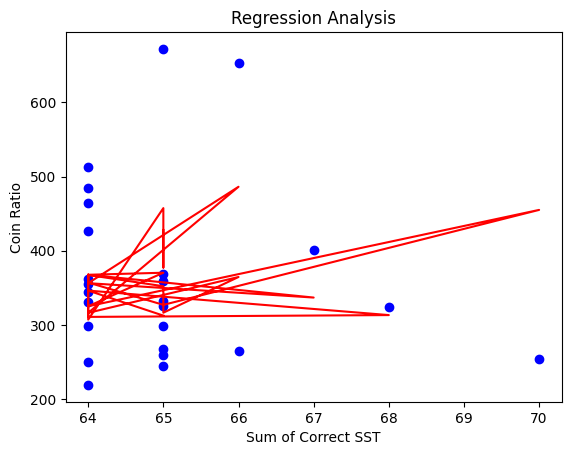

In [84]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset


# Assuming 'X' contains your independent variables and 'y' contains your dependent variable
X = df[['var_rt_ast' ]]  # Independent variable(s)
y = df['line_change_ratio']      # Dependent variable

# Add a constant term to the independent variables (for the intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print a summary of the regression results
print(model.summary())
# Plotting
# Scatter plot of the data points
plt.scatter(df['sum_correct_sst'], y, color='blue', label='Data points')
# Regression line
y_pred = model.predict(X)
plt.plot(df['sum_correct_sst'], y_pred, color='red', label='Regression line')

# Labeling the axes
plt.xlabel('Sum of Correct SST')
plt.ylabel('Coin Ratio')
plt.title('Regression Analysis')

t test

In [10]:
from scipy import stats
#df = df[df['Grade']!=1]
for col in df.columns[3:21]:
    print('---------------------------')
    male = df[df['gender'] == 'male'][col]
    female = df[df['gender'] == 'female'][col]
    t_stat, p_value = stats.ttest_ind(female, male, equal_var=False)

    print("T-statistic: " , col , t_stat)
    print("P-value: " , col , p_value)

---------------------------
T-statistic:  avg_rt_mot 1.7252199256837968
P-value:  avg_rt_mot 0.11572755064702726
---------------------------
T-statistic:  var_rt_mot 1.3576360073478138
P-value:  var_rt_mot 0.22814465198848477
---------------------------
T-statistic:  avg_distance_mot -0.8282969275005336
P-value:  avg_distance_mot 0.425431255178937
---------------------------
T-statistic:  avg_rt_blc 1.5470003450729983
P-value:  avg_rt_blc 0.15569633112046552
---------------------------
T-statistic:  var_rt_blc 1.7689889542558617
P-value:  var_rt_blc 0.11154905607476318
---------------------------
T-statistic:  sum_correct_blc 0.356753034006348
P-value:  sum_correct_blc 0.7276858291980901
---------------------------
T-statistic:  avg_rt_ast 1.1604498203839182
P-value:  avg_rt_ast 0.27049874206413843
---------------------------
T-statistic:  var_rt_ast 1.274495108142916
P-value:  var_rt_ast 0.24875581156991627
---------------------------
T-statistic:  sum_correct_ast -0.9965197110207185
